In [197]:
import pandas as pd

import glob
dfs = []
csv_files = glob.glob("../data/openrouter_*.csv")
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)


df_all = pd.concat(dfs)

df_all = df_all[df_all['model'] != 'openai/gpt-4o-2024-11-20']

In [198]:
df_all

,model,text,yes_tokens_found,no_tokens_found,probability_token,probability_text,prob,date
0,deepseek/deepseek-chat-v3-0324:free,no,"['Yes', 'Yes']","['No', 'No']",0.000710,0.0,0.000710,2025-04-13
2,openai/chatgpt-4o-latest,no,['Yes'],['No'],0.500000,0.0,0.500000,2025-04-13
3,qwen/qwq-32b:free,yes,['yes'],[],NaN,1.0,1.000000,2025-04-13
4,google/gemini-2.5-pro-preview-03-25,yes,['yes'],[],NaN,1.0,1.000000,2025-04-13
5,anthropic/claude-3.7-sonnet:thinking,yes,['yes'],[],NaN,1.0,1.000000,2025-04-13
...,...,...,...,...,...,...,...,...
2,openai/chatgpt-4o-latest,yes,['Yes'],['No'],0.982014,1.0,0.982014,2025-04-22
3,qwen/qwq-32b:free,no,[],['no'],NaN,0.0,0.000000,2025-04-22
4,google/gemini-2.5-pro-preview-03-25,no,[],['no'],NaN,0.0,0.000000,2025-04-22
5,anthropic/claude-3.7-sonnet:thinking,yes,['yes'],[],NaN,1.0,1.000000,2025-04-22


In [205]:
df_all['date'] = pd.to_datetime(df_all.date, format="%Y-%m-%d")
df_all

,model,text,yes_tokens_found,no_tokens_found,probability_token,probability_text,prob,date
0,deepseek/deepseek-chat-v3-0324:free,no,"['Yes', 'Yes']","['No', 'No']",0.000710,0.0,0.000710,2025-04-13
2,openai/chatgpt-4o-latest,no,['Yes'],['No'],0.500000,0.0,0.500000,2025-04-13
3,qwen/qwq-32b:free,yes,['yes'],[],NaN,1.0,1.000000,2025-04-13
4,google/gemini-2.5-pro-preview-03-25,yes,['yes'],[],NaN,1.0,1.000000,2025-04-13
5,anthropic/claude-3.7-sonnet:thinking,yes,['yes'],[],NaN,1.0,1.000000,2025-04-13
...,...,...,...,...,...,...,...,...
2,openai/chatgpt-4o-latest,yes,['Yes'],['No'],0.982014,1.0,0.982014,2025-04-22
3,qwen/qwq-32b:free,no,[],['no'],NaN,0.0,0.000000,2025-04-22
4,google/gemini-2.5-pro-preview-03-25,no,[],['no'],NaN,0.0,0.000000,2025-04-22
5,anthropic/claude-3.7-sonnet:thinking,yes,['yes'],[],NaN,1.0,1.000000,2025-04-22


In [222]:
import sys
sys.path.append('..')

from polymarket_agent.get_data import get_klines


diffs = get_klines('BTCUSDT', '2025-03-01', '2025-04-26')[['open_time', 'diff']]
diffs['y_true'] = diffs['diff'] > 0
diffs

,open_time,diff,y_true
0,2025-03-01,1714.58,True
1,2025-03-02,8205.46,True
2,2025-03-03,-8049.38,False
3,2025-03-04,1060.82,True
4,2025-03-05,3324.03,True
5,2025-03-06,-674.11,False
6,2025-03-07,-3130.13,False
7,2025-03-08,-579.29,False
8,2025-03-09,-5488.09,False
9,2025-03-10,-2138.62,False


In [223]:
df_merged = pd.merge(diffs, df_all, left_on='open_time', right_on='date', how='inner')
df_merged

,open_time,diff,y_true,model,text,yes_tokens_found,no_tokens_found,probability_token,probability_text,prob,date
0,2025-04-01,2608.34,True,deepseek/deepseek-chat-v3-0324:free,no,"['Yes', 'Yes']","['No', 'No']",0.000017,0.0,0.000017,2025-04-01
1,2025-04-01,2608.34,True,openai/chatgpt-4o-latest,yes,"['Yes', ' Yes']",['No'],0.982014,1.0,0.982014,2025-04-01
2,2025-04-01,2608.34,True,qwen/qwq-32b:free,no,[],['no'],NaN,0.0,0.000000,2025-04-01
3,2025-04-01,2608.34,True,google/gemini-2.5-pro-preview-03-25,no,[],['no'],NaN,0.0,0.000000,2025-04-01
4,2025-04-01,2608.34,True,anthropic/claude-3.7-sonnet:thinking,no,[],['no'],NaN,0.0,0.000000,2025-04-01
...,...,...,...,...,...,...,...,...,...,...,...
145,2025-04-25,658.21,True,openai/chatgpt-4o-latest,yes,['Yes'],['No'],0.977023,1.0,0.977023,2025-04-25
146,2025-04-25,658.21,True,qwen/qwq-32b:free,no,[],['no'],NaN,0.0,0.000000,2025-04-25
147,2025-04-25,658.21,True,google/gemini-2.5-pro-preview-03-25,yes,['yes'],[],NaN,1.0,1.000000,2025-04-25
148,2025-04-25,658.21,True,anthropic/claude-3.7-sonnet:thinking,no,[],['no'],NaN,0.0,0.000000,2025-04-25


In [224]:
df_merged_all_models = df_merged.groupby('date')[['prob', 'y_true']].mean().reset_index()

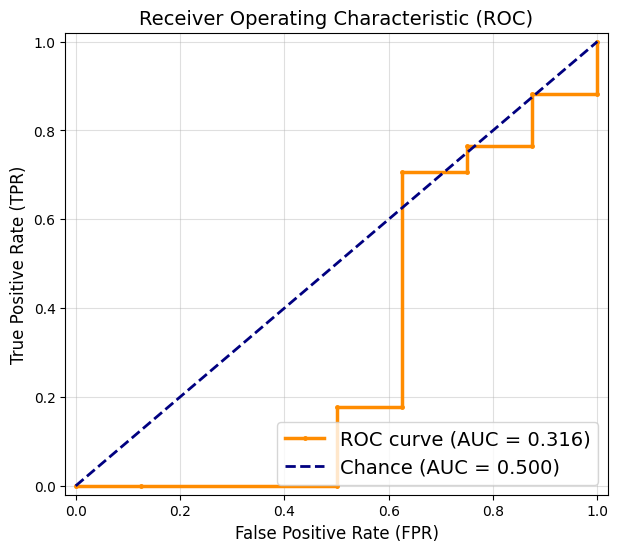

In [225]:
from polymarket_agent.utils import bootstrap_roc_auc, roc_auc_single

roc_auc_single(df_merged_all_models['y_true'], df_merged_all_models['prob'])

In [226]:
roc_auc, lower_bound, upper_bound, aucs = bootstrap_roc_auc(df_merged['y_true'], df_merged['prob'])

print(f"ROC AUC: {roc_auc:.4f} ({lower_bound:.4f}, {upper_bound:.4f})")

ROC AUC: 0.4329 (0.3384, 0.5262)


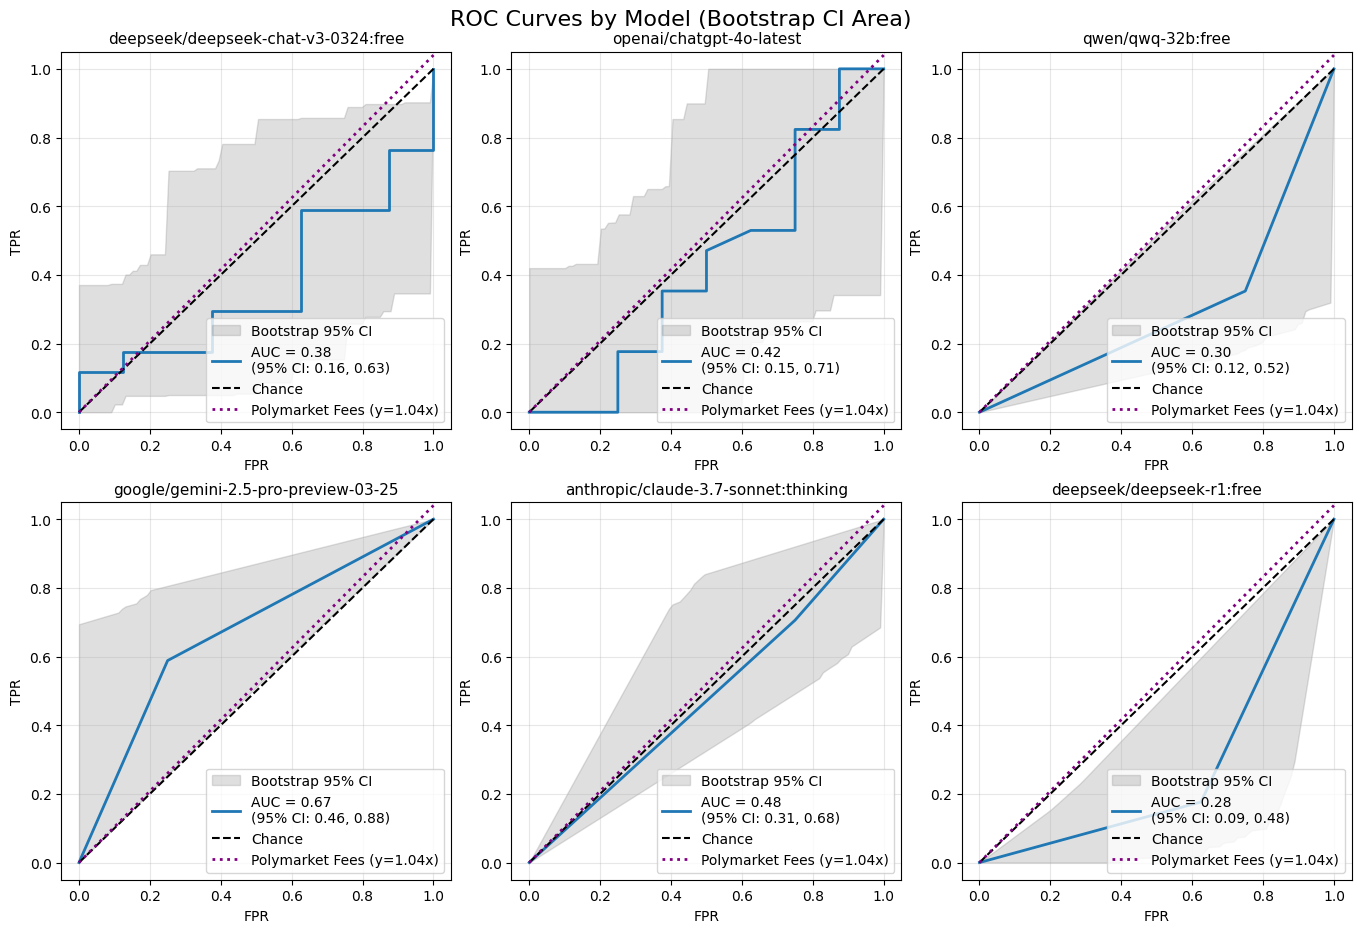

In [250]:
from polymarket_agent.utils import bootstrap_roc_auc

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

models = df_merged['model'].unique()
n_plots = min(7, len(models))

ncols = int(np.ceil(np.sqrt(n_plots)))
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 4.5), constrained_layout=True)
axes = axes.flatten()

n_bootstrap = 100  # Small bootstrap for visualization

for i, model in enumerate(models[:n_plots]):
    df_model = df_merged[df_merged['model'] == model]
    y_true = df_model['y_true'].values
    y_score = df_model['prob'].values
    if len(np.unique(y_true)) < 2:
        continue
    # Main ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc_val, lower, upper, _ = bootstrap_roc_auc(y_true, y_score)
    ax = axes[i]

    # Bootstrap ROC curves for grey area
    rng = np.random.default_rng(42)
    fpr_boot = np.linspace(0, 1, 100)
    tpr_boots = []
    for _ in range(n_bootstrap):
        idx = rng.integers(0, len(y_true), len(y_true))
        if len(np.unique(y_true[idx])) < 2:
            continue
        fpr_b, tpr_b, _ = roc_curve(y_true[idx], y_score[idx])
        tpr_interp = np.interp(fpr_boot, fpr_b, tpr_b)
        tpr_boots.append(tpr_interp)
    if tpr_boots:
        tpr_boots = np.array(tpr_boots)
        tpr_lower = np.percentile(tpr_boots, 2.5, axis=0)
        tpr_upper = np.percentile(tpr_boots, 97.5, axis=0)
        ax.fill_between(fpr_boot, tpr_lower, tpr_upper, color='grey', alpha=0.25, label='Bootstrap 95% CI')

    # Add explanation about 95% CI in the label
    ax.plot(
        fpr, tpr, lw=2,
        label=f'AUC = {roc_auc_val:.2f}\n(95% CI: {lower:.2f}, {upper:.2f})'
    )
    ax.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='black', label='Chance')
    # Add y = 1.04x line for polymarket fees
    x_fee = np.linspace(0, 1, 100)
    y_fee = 1.04 * x_fee
    ax.plot(x_fee, y_fee, linestyle=':', lw=2, color='purple', label='Polymarket Fees (y=1.04x)')
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('FPR', fontsize=10)
    ax.set_ylabel('TPR', fontsize=10)
    ax.set_title(f'{model}', fontsize=11)
    ax.legend(loc="lower right", fontsize=10)
    ax.grid(alpha=0.3)

for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('ROC Curves by Model (Bootstrap CI Area)', fontsize=16, y=1.02)
plt.show()

In [245]:
from sklearn.metrics import average_precision_score

for model in models[:n_plots]:
    df_model = df_merged[df_merged['model'] == model]
    y_true = df_model['y_true'].values
    y_score = df_model['prob'].values
    if len(np.unique(y_true)) < 2:
        print(f"{model}: Not enough classes")
        continue
    pr_auc_1 = average_precision_score(y_true, y_score)
    pr_auc_0 = average_precision_score(1 - y_true, 1 - y_score)
    print(f"{model}: PR AUC (1 as pos) = {pr_auc_1:.3f}, PR AUC (0 as pos) = {pr_auc_0:.3f}")

deepseek/deepseek-chat-v3-0324:free: PR AUC (1 as pos) = 0.678, PR AUC (0 as pos) = 0.281
openai/chatgpt-4o-latest: PR AUC (1 as pos) = 0.627, PR AUC (0 as pos) = 0.401
qwen/qwq-32b:free: PR AUC (1 as pos) = 0.616, PR AUC (0 as pos) = 0.278
google/gemini-2.5-pro-preview-03-25: PR AUC (1 as pos) = 0.770, PR AUC (0 as pos) = 0.426
anthropic/claude-3.7-sonnet:thinking: PR AUC (1 as pos) = 0.671, PR AUC (0 as pos) = 0.311
deepseek/deepseek-r1:free: PR AUC (1 as pos) = 0.626, PR AUC (0 as pos) = 0.266


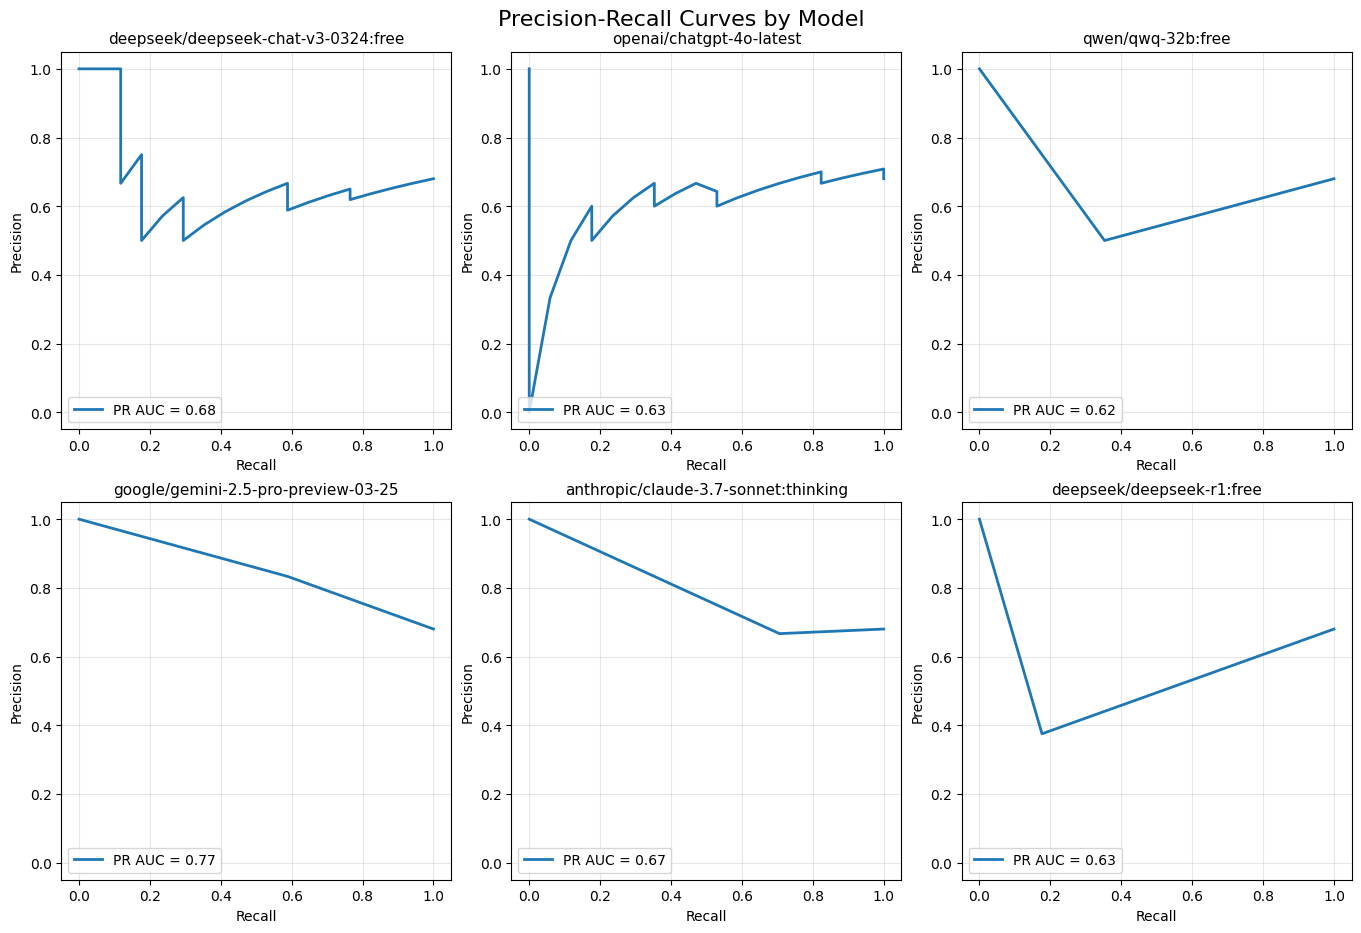

In [244]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

models = df_merged['model'].unique()
n_plots = min(7, len(models))
ncols = int(np.ceil(np.sqrt(n_plots)))
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 4.5), constrained_layout=True)
axes = axes.flatten()

for i, model in enumerate(models[:n_plots]):
    df_model = df_merged[df_merged['model'] == model]
    y_true = df_model['y_true']
    y_score = df_model['prob']
    if len(np.unique(y_true)) < 2:
        continue
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc_val = average_precision_score(y_true, y_score)
    ax = axes[i]
    ax.plot(recall, precision, lw=2, label=f'PR AUC = {pr_auc_val:.2f}')
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('Recall', fontsize=10)
    ax.set_ylabel('Precision', fontsize=10)
    ax.set_title(f'{model}', fontsize=11)
    ax.legend(loc="lower left", fontsize=10)
    ax.grid(alpha=0.3)

for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Precision-Recall Curves by Model', fontsize=16, y=1.02)
plt.show()

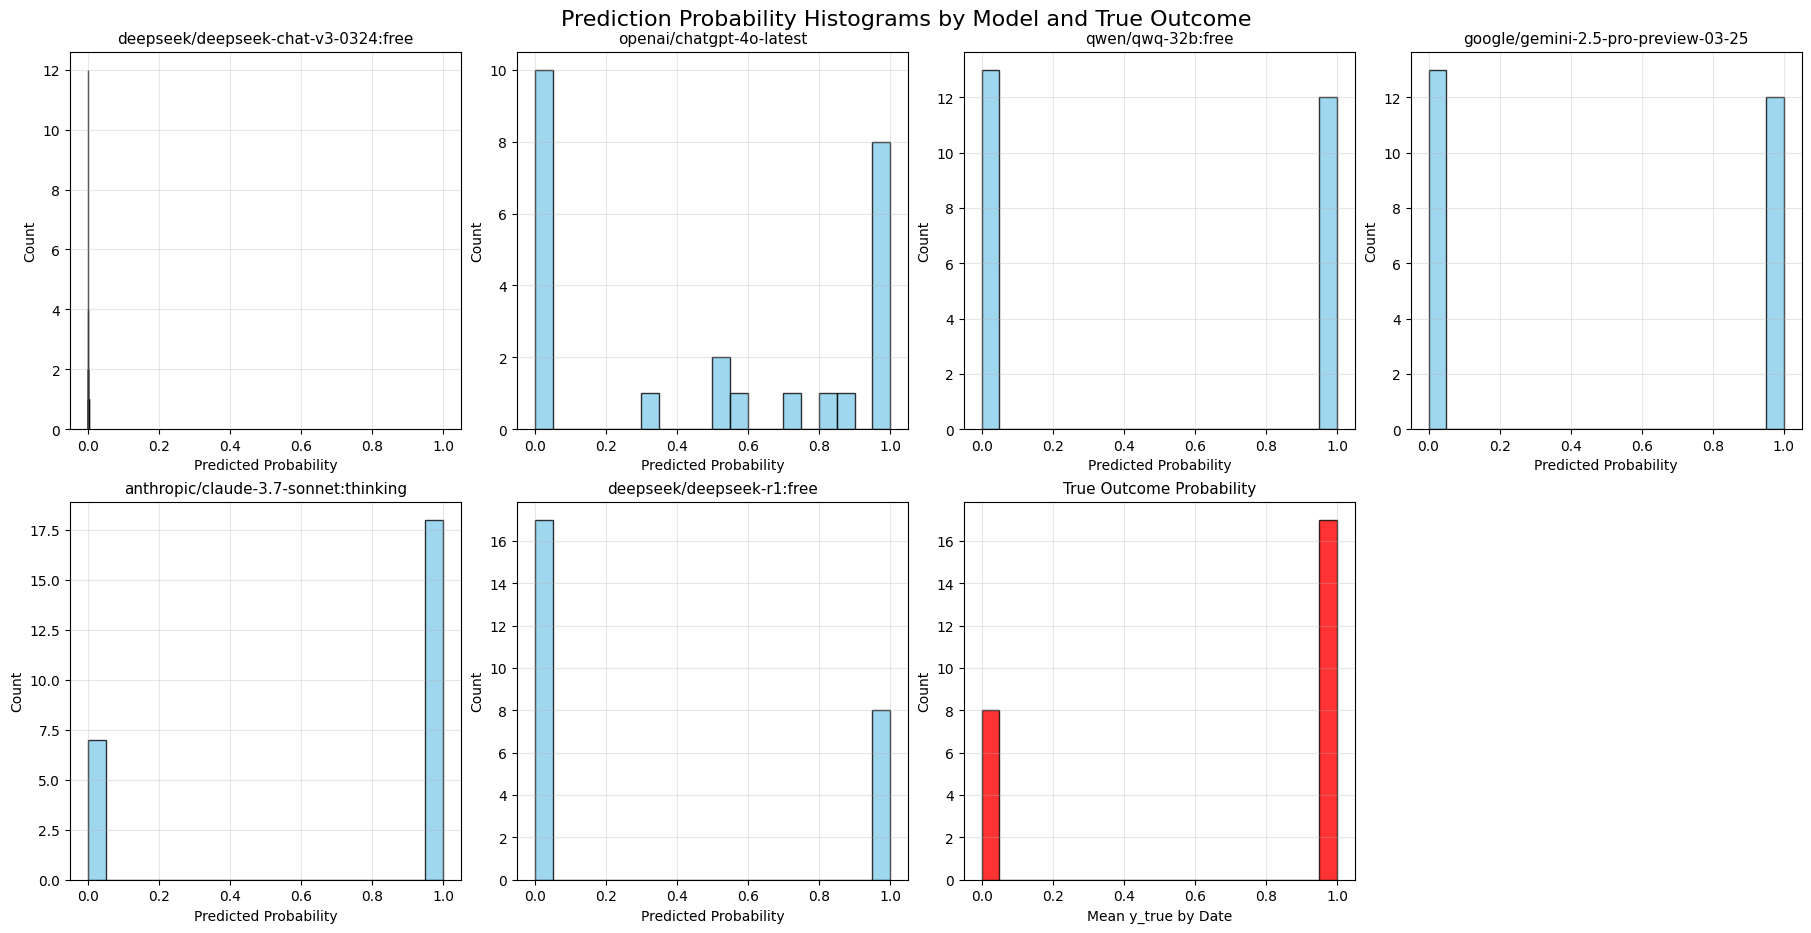

In [233]:
import matplotlib.pyplot as plt
import numpy as np

models = df_merged['model'].unique()
n_plots = min(7, len(models))
# nrows = int(np.ceil(np.sqrt(n_plots)))
# ncols = int(np.ceil(n_plots / nrows))
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols + 1, figsize=((ncols + 1) * 4.5, nrows * 4.5), constrained_layout=True)
axes = axes.flatten()

for i, model in enumerate(models[:n_plots]):
    df_model = df_merged[df_merged['model'] == model]
    y_score = df_model['prob']
    ax = axes[i]
    ax.hist(y_score, bins=20, color='skyblue', edgecolor='black', alpha=0.8)
    ax.set_xlim([-0.05, 1.05])
    ax.set_xlabel('Predicted Probability', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_title(f'{model}', fontsize=11)
    ax.grid(alpha=0.3)

ax = axes[n_plots]
df_merged_all_models['y_true'].hist(bins=20, color='red', edgecolor='black', alpha=0.8, ax=ax)
ax.set_xlabel('Mean y_true by Date', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('True Outcome Probability', fontsize=11)
ax.grid(alpha=0.3)

for j in range(n_plots + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Prediction Probability Histograms by Model and True Outcome', fontsize=16, y=1.02)
plt.show()

In [229]:
df_gemini = df_all[df_all['model'] == 'google/gemini-2.5-pro-preview-03-25']
df_sonnet = df_all[df_all['model'] == 'anthropic/claude-3.7-sonnet:thinking']

In [240]:
df_combo = pd.merge(
    df_gemini[['date', 'prob']],
    df_sonnet[['date', 'prob']],
    on='date',
    suffixes=('_gemini', '_sonnet')
)

df_combo['prob_combo'] = 1 * df_combo['prob_gemini'] + 0 * df_combo['prob_sonnet']
df_combo = df_combo[['date', 'prob_combo']].sort_values(by='date')
df_combo

,date,prob_combo
18,2025-04-01,0.0
4,2025-04-02,0.0
8,2025-04-03,1.0
9,2025-04-04,0.0
3,2025-04-05,0.0
19,2025-04-06,1.0
10,2025-04-07,1.0
17,2025-04-08,0.0
11,2025-04-09,0.0
21,2025-04-10,0.0


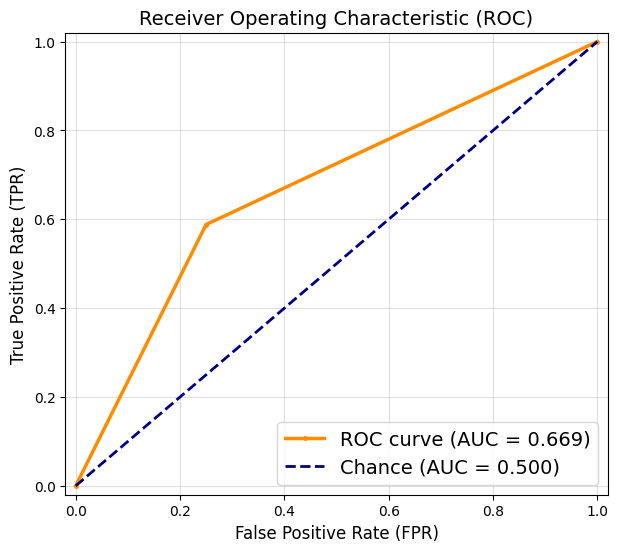

In [241]:
roc_auc_single(df_merged_all_models['y_true'], df_combo['prob_combo'])